# Лабораторная 3. Линейная регрессия

## Датасет

#### Используемый датасет представляет собой синтетический набор данных об успеваемости учащихся. Каждая запись состоит из различных предикторов и индексов успеваемости.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Student_Performance.csv')

pd.set_option('display.max_columns', None)
print(df.describe())

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

#### Итак,

- **Количество**: count = `10_000` элементов в датасете
- **Среднее значение**:
$$
\text{mean} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

 mean =
  - `4.993` часов в среднем студенты провели за учёбой (лодыри жесть)
  - `69.446` - такую оценку в среднем студенты получили на тестах
  - `6.53` часов в среднем студенты спали (оптимистично)
  - `4.58` - работ студенты нарешали для практики
  - `55.225` - средний перформанс студента на курсе (выше 50%, уже хорошо)

- **Стандартное отклонение**:
$$
\text{std} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$
 std (standart deviation) =
  - `2.589` часов - отклонение по времени, потраченному на учёбу.
  - `17.34` - отклонение по результатам тестов. (жесть разброс, рандомычи)
  - `1.696` часов - отклонение по количеству сна.
  - `2.867` - отклонение по количеству решённых работ для практики.
  - `19.213` - отклонение по перформансу студентов. (опять огромный разброс, значит у всех сильно разный перформанс, что очевидно, в целом)

- **Минимум**:
    - `1.0` часов - минимальное количество часов, которое студенты провели за учёбой. (он выбрал быть счастливым)
    - `40.0` - минимальная оценка, которую получили студенты на тестах. (да ну, никто 0 не получал?)
    - `4.0` часов - минимальное количество часов сна. (слабые, никто даже 0-1.5 диапазон не потестил)
    - `0.0` - минимальное количество решённых работ для практики. (силён, надежда умирает последней)
    - `10.0` - минимальный перформанс студента (сплоховал конечно).

- **Максимум**:
    - `9.0` часов - максимальное количество часов, которое студенты провели за учёбой.
    - `99.0` - максимальная оценка, которую получили студенты на тестах.
    - `9.0` часов - максимальное количество часов сна.
    - `9.0` - максимальное количество решённых работ для практики.
    - `100.0` - максимальный перформанс студента (отличный результат).

- **25% квартиль (Q1)**:
    - `3.0` часов - 25% студентов учились меньше или ровно 3 часа.
    - `54.0` - 25% студентов получили оценку ниже или равную 54 на тестах.
    - `5.0` часов - 25% студентов спали меньше или ровно 5 часов.
    - `2.0` - 25% студентов решили меньше или ровно 2 работы.
    - `40.0` - перформанс 25% студентов был ниже 40.

- **50% квартиль (Медиана)**:
    - `5.0` часов - 50% студентов учились меньше или ровно 5 часов.
    - `69.0` - 50% студентов получили оценку ниже или равную 69.
    - `7.0` часов - 50% студентов спали меньше или ровно 7 часов.
    - `5.0` - 50% студентов решили меньше или ровно 5 работ.
    - `55.0` - медианный перформанс студентов (середина группы).

- **75% квартиль (Q3)**:
    - `7.0` часов - 75% студентов учились меньше или ровно 7 часов.
    - `85.0` - 75% студентов получили оценку ниже или равную 85.
    - `8.0` часов - 75% студентов спали меньше или ровно 8 часов.
    - `7.0` - 75% студентов решили меньше или ровно 7 работ.
    - `71.0` - перформанс 75% студентов был ниже 71.


### Визуализация датасета

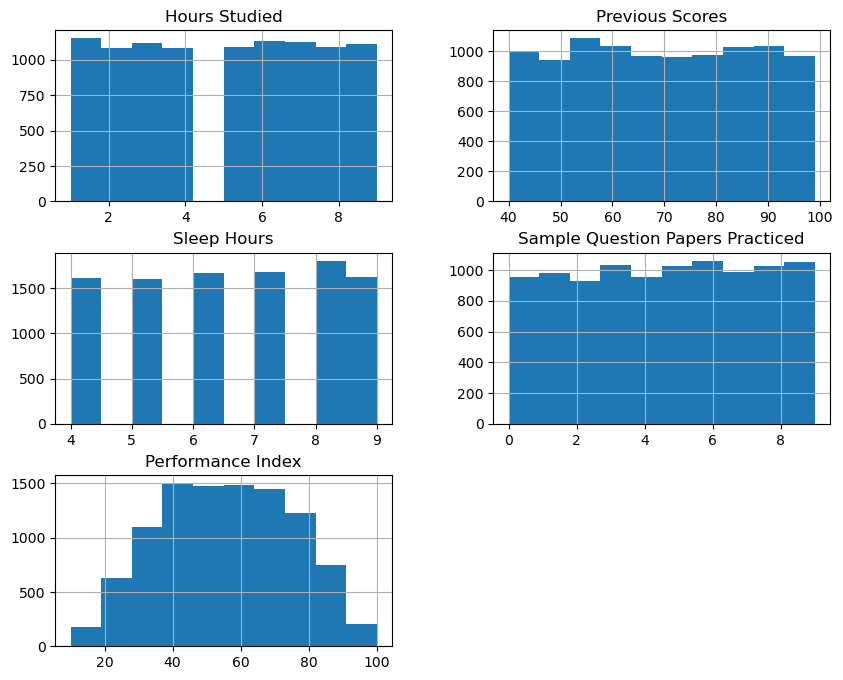

In [2]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,8))
plt.show()

## Предварительная обработка данных
### Обработка отсутствующих значений

In [3]:
# Проверка датасета на наличие пропусков
print(df.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


Получается, что датасет `полностью заполнен`, не нужно никак заполнять пропуски, ибо их просто нет.  

(А как можно было бы? Imputation ->   
средним значением, медианой(для числ. данных),   
часто встречающимся значением (для кат. данных))

### Кодирование категориальных признаков

Что за **категориальные** признаки? Это такие признаки, представляющие *группы* или *категории*, а не количественные измерения чего-то. Их нельзя количественно сравнить, как например количество сна, чей-то рост и т.д.

В моём датасете категориальный признак один, и им является `Extracurricular Activities`. Он делит всех студентов **на две категории** - Yes/No, т.е. учавствует ли студент во внеклассных активностях, или нет. Это не числовая характеристика, и её нужно как-то **закодировать** в числа, чтобы с ней могла работать модель МО.

Я закодирую простым способом - `Label Encoding`. То бишь, просто заменю Yes на 1, и No на 0.

In [4]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


### Нормализация данных

Это преобразование числ. данных к *единому масштабу*. Основной вопрос - зачем? Потому что некоторые алгоритмы МО чувствительны к масштабу признаков. Например, используемая в этой исследовательской работе - **линейная регрессия**.

Простыми словами - если признак имеет значения в диапазоне 0-1000, а другой какой-то признак - в диапазоне 0-10, то модель может отдать непропорционально большие коэффициенты признаку с большим масштабом, игнорируя мелкие, но на самом деле возможно даже более влиятельные признаки.

Теперь вопрос, а как нормализовать?

Самый простой способ - **mix-max нормализация**: приводим все значения к диапазону от 0 до 1:
$$
x_{norm} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

$x$ — исходное значение признака.  
$x_{min}$ и $x_{max}$ — минимальные и максимальные значения признака соответственно.

In [5]:
import numpy as np

def min_max_normalize(column):
    return (column - np.min(column)) / (np.max(column) - np.min(column))

columns_to_scale = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

for col in columns_to_scale:
    df[col] = min_max_normalize(df[col])

print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0          0.750         1.000000                           1          1.0   
1          0.375         0.711864                           0          0.0   
2          0.875         0.186441                           1          0.6   
3          0.500         0.203390                           1          0.2   
4          0.750         0.593220                           0          0.8   

   Sample Question Papers Practiced  Performance Index  
0                          0.111111               91.0  
1                          0.222222               65.0  
2                          0.222222               45.0  
3                          0.222222               36.0  
4                          0.555556               66.0  


## Разделение данных на обучающий и тестовый наборы

In [6]:
import numpy as np

# Разделим данные на признаки (X) и целевую переменную (y)
X = df.drop('Performance Index', axis=1).values
y = df['Performance Index'].values

# Определим размер обучающей выборки (80% от общего количества данных)
train_size = int(0.8 * len(X))

# Перемешаем индексы для случайного разделения
indices = np.random.permutation(len(X))

# Разделим данные на обучающую и тестовую выборки
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Проверим размеры полученных наборов
print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')

Размер обучающей выборки: (8000, 5)
Размер тестовой выборки: (2000, 5)


### Небольшое пояснение

Чё ваще мы делаем?  
|> мы хотим предсказать по признакам X, какая будет целевая переменная Y  
|> поэтому, мы делим столбцы на X и Y  

Зачем делить выборку на *тестовую* и *обучающую*?  
|> так работает МО:  
|> обучающая выборка - данные, на которых обучается модель (анализ зависимостей между признаками (input) и целевой переменной (output), настройка своих коэффициентов)  
|> тестовая выборка - данные, которые **не использовались** при обучении. Нужны чтоб проверить как модель будет предсказывать значения на новых данных.  

## Реализация линейной регрессии с использованием метода наименьших квадратов

### 1. Постановка задачи
Цель — реализовать *линейную регрессию* для предсказания целевой переменной (в данном случае `Performance Index`) на основе других признаков. Буду находить оптимальные коэффициенты линейной модели с использованием **метода наименьших квадратов**.

### 2. Линейная модель
Регрессионная модель представляется в матричном виде следующим образом:

$$
y = X \beta
$$

Где:
- $y$ — целевая переменная (вектор).
- $X$ — матрица признаков (с добавленным столбцом единиц для учета смещения).
- $\beta$ — вектор коэффициентов, который мы ищем.

### 3. Метод наименьших квадратов
Чтобы найти коэффициенты $\beta$, мы минимизируем сумму квадратов разностей между фактическими значениями $y$ и предсказанными значениями $\hat{y} = X \beta$. Оптимальные коэффициенты $\beta$ находятся по следующей формуле:

$$
\beta = (X^T X)^{-1} X^T y
$$

Где:
- $X^T$ — транспонированная матрица признаков.
- $(X^T X)^{-1}$ — обратная матрица для произведения $X^T X$.
- $y$ — вектор целевых значений.

### 4. Шаги реализации
1. Добавляем столбец единиц к признакам $X$, чтобы учесть смещение (intercept).
2. Вычисляем оптимальные коэффициенты $\beta$ с использованием метода наименьших квадратов.
3. Предсказываем значения целевой переменной $y$ на основе найденных коэффициентов.
4. Вычисляем и проверяем предсказания как для обучающих данных, так и для тестовых.


In [7]:
import numpy as np

# Добавляем столбец единиц к X для учёта коэффициента смещения (intercept)
# c_ - concatenate, просто матрицы складываем
# ones - просто массив единичек
X_train_with_bias = np.c_[np.ones(X_train.shape[0]), X_train]

# 1. Вычисляем коэффициенты бета с использованием метода наименьших квадратов
# beta = (X^T X)^{-1} X^T y
# .T - транспонирование матрицы
# @ - матричное умножение
beta = np.linalg.inv(X_train_with_bias.T @ X_train_with_bias) @ X_train_with_bias.T @ y_train

# 2. Предсказание для тренировочного набора
y_train_pred = X_train_with_bias @ beta

# Проверим коэффициенты и предсказания
print("Коэффициенты модели:", beta)
print("Пример предсказанных значений:", y_train_pred[:5])

# Теперь сделаем предсказания на тестовых данных
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]
y_test_pred = X_test_with_bias @ beta

# Проверим пример предсказаний на тестовых данных
print("Пример предсказанных значений для теста:", y_test_pred[:5])

Коэффициенты модели: [11.42608264 22.85065775 60.09127101  0.61927923  2.42993221  1.70869218]
Пример предсказанных значений: [62.14152637 15.65775349 86.2932466  46.38294789 18.02304579]
Пример предсказанных значений для теста: [37.12269914 57.91044131 62.77176486 56.87260507 82.4658461 ]


Итак, мы нашли **коэффициенты регрессии**. Теперь у нас есть линейная функция, которая "наилучшим" образом описывает зависимость между предикторами x_i и зависимой переменной y.

## Построение 3х моделей с различными наборами признаков

Модель 2: Используем только один или два признака, например, Hours Studied и Sample Question Papers Practiced.    
Модель 3: Используем только ключевые признаки, такие как Hours Studied, Previous Scores и Sleep Hours.   
Модель 4: Используем все признаки для предсказания целевой переменной.   

In [8]:
def build_and_evaluate_model(X, y):
    # смещение
    X_with_bias = np.c_[np.ones(X.shape[0]), X]
    
    # коэф-ты
    beta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
    
    # предсказываем зависимую переменную
    y_pred = X_with_bias @ beta
    
    # возвращаем коэф-ты и предсказания
    return beta, y_pred

# м4
X_model_1 = X_train
beta_1, y_train_pred_1 = build_and_evaluate_model(X_model_1, y_train)
print("Коэффициенты для модели 4 (все признаки):", beta_1)

# м3
X_model_2 = X_train[:, [0, 1, 3]]
beta_2, y_train_pred_2 = build_and_evaluate_model(X_model_2, y_train)
print("Коэффициенты для модели 3 (Hours Studied, Previous Scores, Sleep Hours):", beta_2)

# м2
X_model_3 = X_train[:, [0, 4]]
beta_3, y_train_pred_3 = build_and_evaluate_model(X_model_3, y_train)
print("Коэффициенты для модели 2 (Hours Studied, Sample Question Papers Practiced):", beta_3)

Коэффициенты для модели 4 (все признаки): [11.42608264 22.85065775 60.09127101  0.61927923  2.42993221  1.70869218]
Коэффициенты для модели 3 (Hours Studied, Previous Scores, Sleep Hours): [12.58123885 22.87880535 60.13324606  2.39943048]
Коэффициенты для модели 2 (Hours Studied, Sample Question Papers Practiced): [42.9323012  22.0423514   2.57312769]


## Оценка производительности

## Коэффициент детерминации \( R^2 \)

Формула для расчета коэффициента детерминации:

$$
R^2 = 1 - \frac{\sum (y_{\text{true}} - y_{\text{pred}})^2}{\sum (y_{\text{true}} - \bar{y})^2}
$$

Где:
- $ y_{\text{true}} $ — истинные значения целевой переменной.
- $ y_{\text{pred}} $ — предсказанные значения.
- $ \bar{y} $ — среднее значение целевой переменной.
- $ \sum (y_{\text{true}} - y_{\text{pred}})^2 $ — сумма квадратов остатков (SSR).
- $ \sum (y_{\text{true}} - \bar{y})^2 $ — общая сумма квадратов (SST).

In [9]:
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Модель 4
X_model_4 = X_train
beta_4, y_train_pred_4 = build_and_evaluate_model(X_model_4, y_train)
r2_model_4 = r_squared(y_train, y_train_pred_4)
print("R^2 для модели 4 (все признаки):", r2_model_4)

# Модель 3
X_model_3 = X_train[:, [0, 1, 3]]  # Hours Studied, Previous Scores, Sleep Hours
beta_3, y_train_pred_3 = build_and_evaluate_model(X_model_3, y_train)
r2_model_3 = r_squared(y_train, y_train_pred_3)
print("R^2 для модели 3 (Hours Studied, Previous Scores, Sleep Hours):", r2_model_3)

# Модель 2
X_model_2 = X_train[:, [0, 4]]  # Hours Studied, Sample Question Papers Practiced
beta_2, y_train_pred_2 = build_and_evaluate_model(X_model_2, y_train)
r2_model_2 = r_squared(y_train, y_train_pred_2)
print("R^2 для модели 2 (Hours Studied, Sample Question Papers Practiced):", r2_model_2)


R^2 для модели 4 (все признаки): 0.9887812699685805
R^2 для модели 3 (Hours Studied, Previous Scores, Sleep Hours): 0.9876978860537021
R^2 для модели 2 (Hours Studied, Sample Question Papers Practiced): 0.14133014072632766


Производительность моделей, в порядке убывания, указана по аналогиями с автомобилями БМВ серии M:
  - чем больше M, тем тяжелее и сложнее модель (тяжелее, дороже, сложнее машина)
  - чем больше M, тем более точна модель (больше функций, мощнее двигатель, лучше тормоза и трансмиссия у автомобиля)
  - идеальный баланс, как обычно - золотая середина (m3)

|m2|m3|m4|
|-|-|-|
|![m2](https://i.pinimg.com/736x/fb/bf/42/fbbf426c5427cfe7d46b9e8359bc40ba.jpg)|![m3cs](https://i.pinimg.com/564x/da/26/39/da263925cc98828ad390477779d4aabf.jpg)|![m4cs](https://i.pinimg.com/564x/61/ca/c0/61cac0b2e1e9d1aeb87c2d2c3fb217c2.jpg)|

### Итоговый вывод и сравнение моделей

#### Модель 4 (все признаки)
- **\( R^2 = 0.9887\)** — наилучший результат, почти идеальная точность.
- Важные признаки: Previous Scores (60.08), Hours Studied (22.81).
- **Вывод**: Подходит для максимальной точности, если доступны все данные.

#### Модель 3 (Hours Studied, Previous Scores, Sleep Hours)
- **\( R^2 = 0.9875\)** — практически такая же точность, как у модели 4.
- Важные признаки: Previous Scores (60.09), Hours Studied (22.83).
- **Вывод**: Более экономная модель с высокой точностью. Использовать, если нужно меньше признаков.

#### Модель 2 (Hours Studied, Sample Question Papers Practiced)
- **\( R^2 = 0.1412\)** — очень низкая точность.
- Важные признаки: Hours Studied (22.11), Sample Question Papers Practiced (1.83).
- **Вывод**: Не рекомендуется, так как двух признаков недостаточно для точных предсказаний.

### Рекомендации:
- **Модель 4** — для максимальной точности.
- **Модель 3** — для более простой модели с высокой точностью.
- **Модель 2** — слишком упрощенная, с низкой точностью.


# Бонус: крутите барабан

### Шаги для введения синтетического признака:
Скрафтим синтетический признак, который отражает баланс между тем, насколько **мало** студент занимался и насколько **много** он спал. Назовём этот признак **"Chose to Be Happy Index"**.

Примерная формула:

$$
\text{CTBH} = \frac{\text{Sleep Hours}}{(\text{Hours Studied} + 1) \cdot (\text{Sample Question Papers Practiced} + 1)}
$$

Этот индекс будет выше для студентов, которые уже поняли смысл жизни и преисполнились в своём сознании, больше времени проводят со своими родными, девушками/жёнами, трогают траву и т.д.


In [10]:
df['CTBH'] = df['Sleep Hours'] / ((df['Hours Studied'] + 1) * (df['Sample Question Papers Practiced'] + 1))

# Обновим тренировочные данные с учетом нового признака
X_train_with_happiness = np.c_[X_train, df['CTBH'].iloc[:X_train.shape[0]]]

# Строим модель и оцениваем её с использованием нового синтетического признака
beta_happiness, y_train_pred_happiness = build_and_evaluate_model(X_train_with_happiness, y_train)

# Рассчитаем коэффициент детерминации R^2
r2_happiness = r_squared(y_train, y_train_pred_happiness)
r2_happiness

0.9887814514612749

Что сказать, ну коэф. детерминации теперь лучше всех моделей m2-4.
Получили следующий аппарат получается:

|m5|
|-|
|![m5](https://i.pinimg.com/736x/8c/f2/fb/8cf2fb2bcdd4ffacfea727751f2a360f.jpg)|